In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (20).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (16).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (79).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (55).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (53).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (23).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (42).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (72).png
/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Im

In [16]:
import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D, GlobalAveragePooling2D, Activation, Multiply, Concatenate, Conv2D, Input, Flatten, Layer
from keras.models import Model
from keras.applications.vgg16 import VGG16
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
seed = 60  

train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2, 
    subset='training', 
    seed=seed  
)
validation_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/grapevine-leaves-image-dataset/Grapevine_Leaves_Image_Dataset',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,  
    subset='validation',  
    seed=seed  # Add seed argument
)

train_data = train_data.map(lambda x, y: (x / 255.0, y))
validation_data = validation_data.map(lambda x, y: (x / 255.0, y))


Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


# Train VGG16

In [8]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable=False
output=base_model.output
flat=Flatten()(output)
final=Dense(5,activation='softmax')(flat)
model=Model(inputs=base_model.input,outputs=final)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │       163,845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,878,533 (56.76 MB)

 Trainable params: 163,845 (640.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 183s 14s/step - accuracy: 0.2756 - loss: 2.6244 - val_accuracy: 0.7400 - val_loss: 1.1374
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 182s 14s/step - accuracy: 0.6391 - loss: 1.1011 - val_accuracy: 0.6500 - val_loss: 1.0146
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 14s/step - accuracy: 0.8396 - loss: 0.4972 - val_accuracy: 0.7800 - val_loss: 0.6298
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 182s 14s/step - accuracy: 0.9603 - loss: 0.2602 - val_accuracy: 0.7900 - val_loss: 0.5156
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 182s 14s/step - accuracy: 0.9675 - loss: 0.2091 - val_accuracy: 0.8200 - val_loss: 0.4874
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 14s/step - accuracy: 0.9819 - loss: 0.1509 - val_accuracy: 0.8500 - val_loss: 0.4144
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 14s/step - accuracy: 0.9917 - loss: 0.1315 - val_accuracy: 0.7600 - val_loss: 0.5650
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 14s/step - accuracy: 0.9990 - loss: 0.1208 - val_accuracy: 0.

Minimum validation loss: 0.35404133796691895


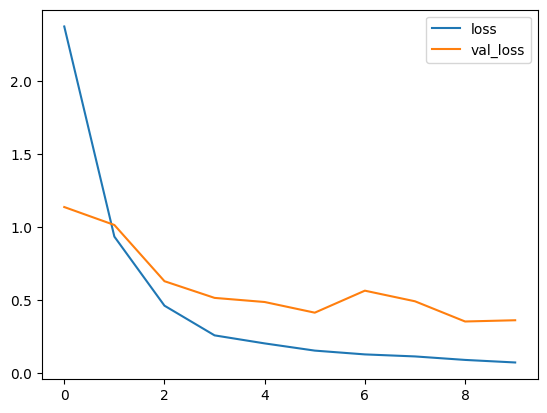

In [10]:
history_df=pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Let's Train the same data using CBAM model

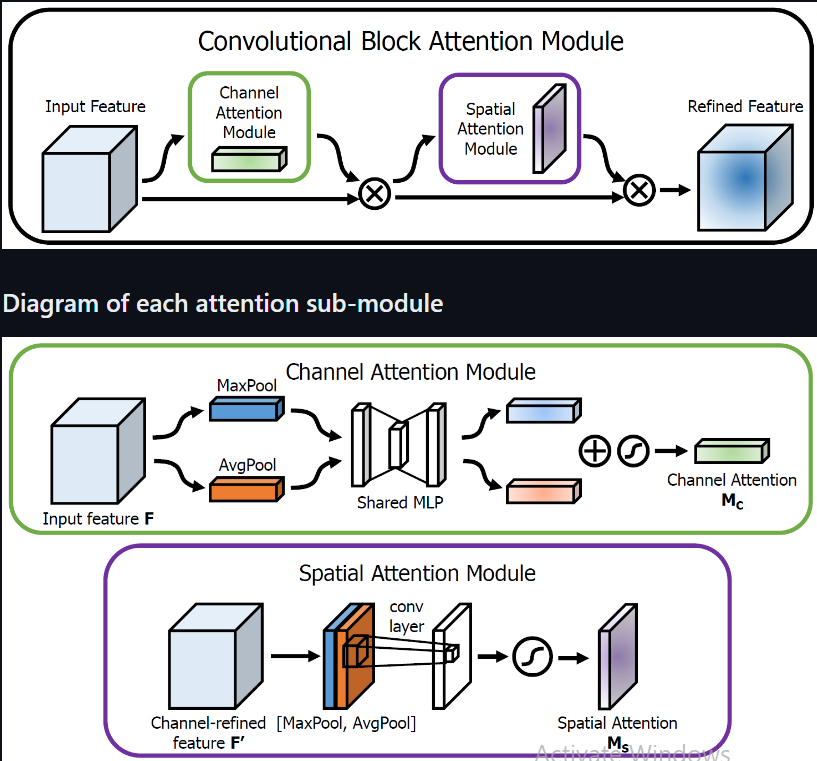

In [22]:
class ChannelAttention(Layer):
    def __init__(self, channels, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.channels = channels
        self.conv = Conv2D(channels, 1, activation=tf.nn.relu)

    def call(self, x):
        # Apply Global Max Pooling and Global Average Pooling
        g = tf.reduce_max(x, axis=(1, 2), keepdims=True)  #shape (B,1,1,C)
        a = tf.reduce_mean(x, axis=(1, 2), keepdims=True) #shape (B,1,1,C)

        # Pass through Conv2D layer
        new_global = self.conv(g)
        new_avg = self.conv(a)

        # Combine and apply sigmoid activation
        total = tf.add(new_global, new_avg)  #shape (B,1,1,C)
        final = tf.nn.sigmoid(total)

        return tf.multiply(x, final)

class SpatialAttention(Layer):
    def __init__(self, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.conv = Conv2D(1, kernel_size=7, padding='same', activation='sigmoid')

    def call(self, x):
        # Compute mean and max along the channel axis
        x1 = tf.reduce_mean(x, axis=3, keepdims=True)  #shape (B,H,W,1)
        x2 = tf.reduce_max(x, axis=3, keepdims=True)   #shape (B,H,W,1)

        # Concatenate along the channel axis
        feat = Concatenate(axis=-1)([x1, x2])  #shape (B,H,W,2)

        # Apply a Conv2D layer
        conv = self.conv(feat)   #shape (B,H,W,1)

        # Multiply with the input feature map
        return Multiply()([x, conv])

class NewModel:
    def __init__(self):
        self.channel_attention_module = None
        self.spatial_attention_module = None

    def build_model(self, base_model, input_shape):
        # Define input
        inputs = Input(shape=input_shape)

        # Get base model output
        outputs = base_model(inputs)

        # Channel Attention
        channels = outputs.shape[-1]
        ch = ChannelAttention(channels)(outputs)

        # Spatial Attention
        sp = SpatialAttention()(ch)

        # Flatten and final dense layer
        flat = Flatten()(sp)
        final_output = Dense(5, activation='sigmoid')(flat)

        # Create and return model
        model = Model(inputs, final_output)
        return model

# Example usage
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(256, 256, 3))  # Example base model
for layer in base_model.layers:
    layer.trainable=False
cbam_model = NewModel()
final_model = cbam_model.build_model(base_model, input_shape=(256, 256, 3))
final_model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_attention_2             │ (None, 8, 8, 512)      │       262,656 │
│ (ChannelAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_attention_2             │ (None, 8, 8, 512)      │            99 │
│ (SpatialAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │       163,845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,141,288 (57.76 MB)

 Trainable params: 426,600 (1.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = final_model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 184s 14s/step - accuracy: 0.9055 - loss: 0.3152 - val_accuracy: 0.8400 - val_loss: 0.4676
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 201s 14s/step - accuracy: 0.9780 - loss: 0.1771 - val_accuracy: 0.8100 - val_loss: 0.4223
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 203s 14s/step - accuracy: 0.9961 - loss: 0.1074 - val_accuracy: 0.8200 - val_loss: 0.4364
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 185s 14s/step - accuracy: 0.9934 - loss: 0.0849 - val_accuracy: 0.8300 - val_loss: 0.4205
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 14s/step - accuracy: 0.9996 - loss: 0.0541 - val_accuracy: 0.8300 - val_loss: 0.3692
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 202s 14s/step - accuracy: 0.9953 - loss: 0.0453 - val_accuracy: 0.8400 - val_loss: 0.3677
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 203s 14s/step - accuracy: 1.0000 - loss: 0.0329 - val_accuracy: 0.8600 - val_loss: 0.3598
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 14s/step - accuracy: 1.0000 - loss: 0.0330 - val_accuracy: 0.

Minimum validation loss: 0.3508995771408081


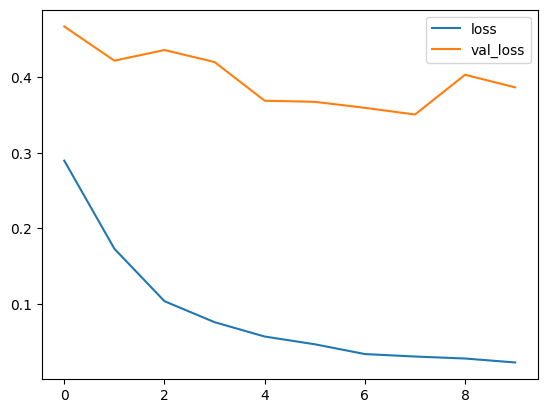

In [26]:
history_df=pd.DataFrame(history.history)
history_df.loc[:,["loss","val_loss"]].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Cleary our model is overfitting but the purpose the this notebook to implement CBAM on image classification 